In [84]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
import numpy as np
import matplotlib.pyplot as plt

In [85]:
#[0 1 2] -> [1 0 0] [0 1 0] [0 0 1]
#vector zeros co do dai bang so class -> vector độ dài C -> [0, 0, 0..., 0]-> dữ liệu đc gán nhãn j -> y[j] = 1
from keras.utils import np_utils
n_classes = len(set(list(Y_train)))
Y_train = np_utils.to_categorical(Y_train)
print(Y_train.shape)

(60000, 10)


In [86]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train = np.hstack((X_train, np.zeros((X_train.shape[0], 1))))
print(X_train.shape)

(60000, 785)


In [87]:
def softmax(Z):
  #print(Z.shape)
  #e^a/(e^a + e^b + e^c) = e^(a - c) / e^(a-c) + e^(b-c) + 1
  max_Z = np.max(Z, axis = 1)
  #Z co shape (N, classes)
  #print(max_Z.shape)
  Z_t = Z.T
  Z_t = Z_t - max_Z
  new_Z = Z_t.T
  new_Z = np.exp(new_Z)
  sum_eZT = np.sum(new_Z, axis = 1).reshape(-1)
  ez_T = new_Z.T
  ez_T /= sum_eZT
  ez = ez_T.T
  return ez

In [88]:
def relu(Z):
  new_Z = Z
  new_Z[new_Z < 0] = 0.
  return new_Z
def sigmoid(Z):
  return 1/(np.exp(-Z) + 1)
def activation(Z, type):
  if type == "relu":
    return relu(Z)
  if type == "softmax":
    return softmax(Z)
  if type == "sigmoid":
    return sigmoid(Z)
  return Z
def gradient(Z, type):
  if type == "relu":
    new_Z = np.ones(Z.shape)
    new_Z[new_Z < 0] = 0.
    return new_Z
  if type == "softmax":
    return softmax(Z) * (1 - softmax(Z))
  if type == "sigmoid":
    return sigmoid(Z) * (1 -sigmoid(Z))
  return np.ones(Z.shape)
def crossentropy_loss(Z, Y):
  return -np.sum(np.sum(Y * np.log(Z), axis = 1),axis = 0)/Y.shape[0]
class NeuralNetwork():
  def __init__(self, layers_node, layers_activation, input, output):
    #(200, 10)-> 128 -> [200, 128]-> (10, 128)
    #layers_information : [(128, ""), (128, "softmax")]
    self.layers_activation = layers_activation
    self.layers_node = layers_node
    #np.random.rand(self.layers_node[index - 1], layer_node)
    #np.full((input.shape[1], layer_node), 0.1)
    #np.full((self.layers_node[index - 1], layer_node)
    self.weights = [(np.random.rand(input.shape[1], layer_node)/1e6 if index == 0 else np.random.rand(self.layers_node[index - 1], layer_node)/1e6) 
                      for (index, layer_node) in enumerate(self.layers_node)]
    self.input = input
    self.output = output
  def feed_forward(self, input):
    output = input.copy()
    Z = []
    A = []
    A.append(input)
    for index, weight in enumerate(self.weights):
      output = output.dot(weight)
      Z.append(output)
      output = activation(output, self.layers_activation[index])
      A.append(output)
    return Z, A
  def backpropagation(self, input, output, lr):
      Z, A = self.feed_forward(input)
      #print(Z[0].shape)
      #print(A[0].shape)
      E = []
      for i in range(len(self.weights) - 1, -1, -1):
        if i == len(self.weights) - 1:
          E.append(A[i + 1] - output)
        else:
          E.append((E[-1].dot(self.weights[i + 1].T))* gradient(Z[i], self.layers_activation[i]))
        #print(A[i - 1].shape)
        #print(E[-1].shape)
        self.weights[i] -= lr * (A[i].T.dot(E[-1]))
      return Z, A
  def training(self, lr, number_iterations, batch_size):
    list_loss = []
    for epoch in range(number_iterations):
      random = np.random.permutation(int(X_train.shape[0]/batch_size))
      sum_loss = 0
      for j in random:
        Xj = self.input[j * batch_size : (j + 1) * batch_size]
        Yj = self.output[j * batch_size : (j + 1) * batch_size]
        Z, A = self.backpropagation(Xj, Yj, lr)
        sum_loss += crossentropy_loss(A[-1], Yj)
      if epoch % 10 == 0:
        print("Epoch {}: loss value = {}".format(epoch, sum_loss / random.shape[0]))
        list_loss.append(sum_loss / random.shape[0])
    return list_loss
model = NeuralNetwork([128, n_classes], ["sigmoid", "softmax"], X_train, Y_train)
history = model.training(1e-5, 300, 32)
#4600 = N 
#200, 100
#4600 , 100
#100 , 20
#4600, 20 * 20, 100 = 4600, 100

Epoch 0: loss value = 2.169132577226512
Epoch 10: loss value = 1.5317982097205627
Epoch 20: loss value = 1.309289415481954
Epoch 30: loss value = 0.9575468317451395
Epoch 40: loss value = 0.7923913075675655
Epoch 50: loss value = 0.7112120200265175
Epoch 60: loss value = 0.6674422247228606
Epoch 70: loss value = 0.6391364437443364
Epoch 80: loss value = 0.6134395349105923
Epoch 90: loss value = 0.5246617186850109
Epoch 100: loss value = 0.4150384133528178
Epoch 110: loss value = 0.32727726424291725
Epoch 120: loss value = 0.2694736048698759
Epoch 130: loss value = 0.23056510715292086
Epoch 140: loss value = 0.2027806760771426
Epoch 150: loss value = 0.180989535572708
Epoch 160: loss value = 0.1642045306562213
Epoch 170: loss value = 0.15105814460986805
Epoch 180: loss value = 0.14035757163449164
Epoch 190: loss value = 0.1320786126103797
Epoch 200: loss value = 0.12514615383611302
Epoch 210: loss value = 0.11830354356441823
Epoch 220: loss value = 0.11415438016035126
Epoch 230: loss va

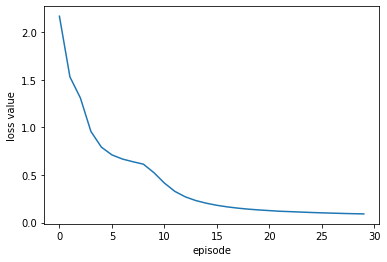

In [89]:
plt.plot(history)
plt.ylabel('loss value')
plt.xlabel('episode')
plt.show()

In [91]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test = np.hstack((X_test, np.zeros((X_test.shape[0], 1))))
Y_test = np_utils.to_categorical(Y_test)
def test_score(X, Y, model, train_test):
  Y_predict = np.argmax(model.feed_forward(X)[1][-1], axis = 1)
  Y_real = np.argmax(Y, axis = 1)
  error = Y_predict - Y_real
  score = error[error == 0].shape[0] / error.shape[0]
  print("{} accuracy is {}%".format(train_test, 100 * score))
test_score(X_train, Y_train, model, "Train")
test_score(X_test, Y_test, model, "Test")

Train accuracy is 98.19833333333334%
Test accuracy is 94.91000000000001%
